___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

# Load the dataset

In [3]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
    'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
#     'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
    'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
#     'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
#     'DISTANCE',
    'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [4]:
cols_dtypes = {
    'MONTH' : 'string',
#     'DAY_OF_MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
#     'TAIL_NUM' : 'string',
    'ORIGIN' : 'string',
#     'ORIGIN_CITY_NAME' : 'string',
#     'ORIGIN_STATE_ABR' : 'string',
#     'ORIGIN_STATE_NM' : 'string',
#     'WBAN_Origin_OTP' : 'string',
    'DEST' : 'string',
#     'DEST_CITY_NAME' : 'string',
#     'DEST_STATE_ABR' : 'string',
#     'DEST_STATE_NM' : 'string',
#     'WBAN_Dest_OTP' : 'string',
#     'CRS_DEP_TIME' : 'string',
#     'DEP_TIME' : 'string',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'string',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'string',
#     'ARR_TIME' : 'string',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'string',
#     'CANCELLED' : 'string',
#     'CRS_ELAPSED_TIME' : 'int32',
#     'DISTANCE' : 'int32',
    'DISTANCE_GROUP' : 'string',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'string',
#     'WMO_Origin' : 'string',
#     'WBAN_Origin_LCD' : 'string',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'float64',
#     'HourlyWindDirection_Origin' : 'string',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
#     'REM_Origin' : 'string',
#     'STATION_Dest' : 'string',
#     'WMO_Dest' : 'string',
#     'WBAN_Dest_LCD' : 'string',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'float64',
#     'HourlyWindDirection_Dest' : 'string',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
#     'REM_Dest' : 'string',
}

___

## 1. Load the dataset

In [5]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT-NOAA",
                                           "OTP_LCD_allColumns_v2.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT-NOAA\\OTP_LCD_allColumns_v2.csv'

In [6]:
%%time

df = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df.sample(5)

Wall time: 1min 8s


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_DEL15,ARR_TIME_hour,DISTANCE_GROUP,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
5266241,08,3,UA,PHX,SFO,13,13,6,0,15,3,29.860,110.0,0.0,7.0,FEW,10.00,0.0,7.0,29.90,89.0,0.0,28.0,CLR,10.00,0.0,20.0
3019668,12,5,WN,BNA,CHS,9,10,5,0,11,2,30.285,55.0,0.0,83.0,(missing),9.94,0.0,5.0,30.24,75.0,0.0,60.0,BKN,10.00,0.0,3.0
2205334,11,5,YX,IAH,SDF,10,17,7,0,13,4,30.390,55.0,0.0,55.0,CLR,10.00,0.0,3.0,30.34,39.0,0.0,55.0,(missing),9.94,0.0,6.0
415076,12,1,EV,CLE,IAH,6,16,8,1,8,5,30.170,30.0,0.0,82.0,OVC,6.00,0.0,5.0,29.86,75.0,0.0,84.0,OVC,7.00,0.0,9.0
5002361,01,6,DL,MCI,DTW,15,12,7,1,18,3,30.070,30.0,0.0,92.0,(missing),1.49,0.0,15.0,30.42,29.0,0.0,58.0,OVC,10.00,0.0,9.0


In [47]:
import streamlit as st
from joblib import load
import pickle
import numpy as np
import pandas as pd

# Load the model:
model = load("XGBoost_30_best_dask_rscv.joblib.dat")

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# Define the dataset columns:
cols = [
    'MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
    'ORIGIN',
    'DEST',
    'DEP_TIME_hour',
    'TAXI_OUT_median',
    'TAXI_IN_median',
    'ARR_TIME_hour',
    'DISTANCE_GROUP',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest'
]

cols_dtypes = {
    'MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
    'ORIGIN' : 'string',
    'DEST' : 'string',
    'DEP_TIME_hour' : 'string',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
    'ARR_TIME_hour' : 'string',
    'DISTANCE_GROUP' : 'string',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'float64',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'float64',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
}

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def frontend_appearance():
    """
    Design frontend appearance
    """

    # frontend elements of the web page 
    html_temp = """ 
    <div style ="background-color:powderblue;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Flight Delay Prediction ML App</h1> 
    </div> 
    """   
    # display the frontend aspect
    st.markdown(html_temp, unsafe_allow_html = True) 

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------  
    
def user_inputs():
    """
    Define user input fields
    """

    # Load the target-encoding mapper dictionary:
    te_map_file = open("te_map_file.pkl", "rb")
    te_map_dict = pickle.load(te_map_file)
   
    # Create user input fields:
    # Categorical:
    month = st.selectbox('Month', sorted(list(te_map_dict['MONTH'])))
    weekday = st.selectbox('Weekday', sorted(list(te_map_dict['DAY_OF_WEEK'])))
    carrier = st.selectbox('A/L', sorted(list(te_map_dict['OP_UNIQUE_CARRIER'])))
    origin = st.selectbox('Origin', sorted(list(te_map_dict['ORIGIN'])))
    dest = st.selectbox('Destination', sorted(list(te_map_dict['DEST'])))
    deptime = st.selectbox('Departure time', sorted([int(hour) for hour in list((te_map_dict['DEP_TIME_hour']))]))
    arrtime = st.selectbox('Arrival time', sorted([int(hour) for hour in list((te_map_dict['ARR_TIME_hour']))]))
    distgroup = st.selectbox('Distance group', sorted([int(group) for group in list((te_map_dict['DISTANCE_GROUP']))]))
    skyorigin = st.selectbox('Sky conditions (Origin)', sorted(list(te_map_dict['HourlySkyConditions_Origin'])))
    skydest = st.selectbox('Sky conditions (Dest)', sorted(list(te_map_dict['HourlySkyConditions_Dest'])))
    
    # Numerical:
    taxiout = st.number_input('TAXI_OUT_median')
    taxiin = st.number_input('TAXI_IN_median')
    altsetorigin = st.number_input('HourlyAltimeterSetting_Origin')
    temporigin = st.number_input('HourlyDryBulbTemperature_Origin')
    preciporigin = st.number_input('HourlyPrecipitation_Origin')
    relhumorigin = st.number_input('HourlyRelativeHumidity_Origin')
    visiborigin = st.number_input('HourlyVisibility_Origin')
    gustorigin = st.number_input('HourlyWindGustSpeed_Origin')
    windorigin = st.number_input('HourlyWindSpeed_Origin')
    altsetdest = st.number_input('HourlyAltimeterSetting_Dest')
    tempdest = st.number_input('HourlyDryBulbTemperature_Dest')
    precipdest = st.number_input('HourlyPrecipitation_Dest')
    relhumdest = st.number_input('HourlyRelativeHumidity_Dest')
    visibdest = st.number_input('HourlyVisibility_Dest')
    gustdest = st.number_input('HourlyWindGustSpeed_Dest')
    winddest = st.number_input('HourlyWindSpeed_Dest')
    
    user_inputs = [month, weekday, carrier, origin, dest, deptime, int(float(taxiout)), int(float(taxiin)), arrtime, distgroup, 
                   altsetorigin, temporigin, preciporigin, relhumorigin, skyorigin, visiborigin, gustorigin, windorigin,
                   altsetdest, tempdest, precipdest, relhumdest, skydest, visibdest, gustdest, winddest]
    result = "ABCDE"
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
#         result = prediction(Gender, Married, ApplicantIncome, LoanAmount, Credit_History) 
        st.success('Your flight is {}'.format(result))
        print(result)
    
    return user_inputs
# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def te_mapper(te_dict, x):
    """
    Mapper function to apply Training's target encoded values to user categorical inputs
    """
    
    try:
        te_mapper = te_dict[x] # If category appeared in Training dataset, apply the corresponding value
    except KeyError:
        te_mapper = np.median(list(te_dict.values())) # Otherwise, apply the median from the entire Training dataset
    return te_mapper

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# @st.cache()
def target_encoding(X_test):
    """
    Take the user input variables and apply the 'te_mapper' encoding to prepare data for model feeding
    """
    # Load the target-encoding mapper dictionary:
    te_map_file = open("te_map_file.pkl", "rb")
    te_map_dict = pickle.load(te_map_file)

    # Declare which features are going to be target-encoded:
    te_features = X_test.select_dtypes(['string', 'category']).columns.to_list()
    
    # Map the values using the 'te_mapper' function:
    for cat_col in te_features:
        X_test[cat_col + '_te'] = X_test[cat_col].apply(lambda x: te_mapper(te_map_dict[cat_col], x))
    # Drop the original features to harmonize format:
    X_test.drop(te_features, axis=1, inplace=True)
    
    return X_test        

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

def prediction(model, prepared_data):  
    # Making predictions: 
    prediction = model.predict(prepared_data)
    score = model.predict_proba(prepared_data)[0, 0]
    if prediction == 0:
        result = 'ON-TIME'
    else:
        result = 'DELAYED'
    if result == 'ON-TIME':
        print('The flight is likely to be {} ({:5.2f}%)'.format(result, 100*score))
    elif result == 'DELAYED':
        print('The flight is likely to be {} ({:5.2f}%)'.format(result, 100*(1-score)))
    

In [50]:
eg = df.sample(n=10, random_state=1)
eg = df.iloc[[5003796], :]
X_test = eg.drop('ARR_DEL15', axis=1)
y_test = eg['ARR_DEL15']

print(y_test)
X_test

5003796    1
Name: ARR_DEL15, dtype: int32


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,DISTANCE_GROUP,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlySkyConditions_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlySkyConditions_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest
5003796,01,7,WN,SAN,PHX,16,12,5,18,2,30.045,68.0,0.0,31.0,(missing),9.94,0.0,7.0,29.97,63.0,0.0,25.0,SCT,10.0,0.0,5.0


In [51]:
# frontend_appearance()
# inputs = user_inputs()
# X_test = pd.DataFrame(
#         data=np.array(inputs)[np.newaxis], # Kind of transpose the resulting array from the 'inputs' list
#         columns=cols
#     )


X_test = X_test.astype(cols_dtypes)
# X_test
prepared_data = target_encoding(X_test)
# prepared_data
prediction(model, prepared_data)

The flight is likely to be ON-TIME (58.51%)


In [52]:
y_test

5003796    1
Name: ARR_DEL15, dtype: int32

In [53]:
model.predict(X_test)

array([0])

In [54]:
score

0.5850524

# Model Interpretability: `eli5`

## Permutation importances

In [166]:
import eli5
from eli5.sklearn import PermutationImportance

eg = df.sample(frac=0.2, random_state=1)
X_test = eg.drop('ARR_DEL15', axis=1)
y_test = eg['ARR_DEL15']
X_test = X_test.astype(cols_dtypes)
prepared_data = target_encoding(X_test)

perm = PermutationImportance(model, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0169 ± 0.0004,HourlyRelativeHumidity_Origin
0.0149 ± 0.0003,HourlyRelativeHumidity_Dest
0.0131 ± 0.0005,DEP_TIME_hour_te
0.0069 ± 0.0003,DEST_te
0.0054 ± 0.0002,MONTH_te
0.0034 ± 0.0004,ORIGIN_te
0.0025 ± 0.0002,HourlyAltimeterSetting_Origin
0.0025 ± 0.0002,HourlyVisibility_Origin
0.0024 ± 0.0001,HourlyDryBulbTemperature_Dest
0.0021 ± 0.0002,HourlyAltimeterSetting_Dest


## Partial dependence plot

In [167]:
te_map_file = open("te_map_file.pkl", "rb")
te_map_dict = pickle.load(te_map_file)
te_map_file.close()
te_map_dict['OP_UNIQUE_CARRIER']

{'DL': 0.14486016488411277,
 'WN': 0.17556729024889522,
 'UA': 0.21372101032688243,
 'YV': 0.21125150529565215,
 'G4': 0.2017240513385624,
 'AA': 0.21070379086264018,
 'B6': 0.2530682073676599,
 'OO': 0.18821136728459978,
 '9E': 0.17543383378304855,
 'HA': 0.1150522194170638,
 'YX': 0.19235843010096781,
 'MQ': 0.2091853961030441,
 'AS': 0.18515675913277949,
 'OH': 0.19839036011677172,
 'F9': 0.25529971334236734,
 'EV': 0.2586235311223349,
 'NK': 0.18864410932010747}

In [168]:
carrier = pd.Series(te_map_dict['OP_UNIQUE_CARRIER'], index=te_map_dict['OP_UNIQUE_CARRIER'].keys())
carrier = pd.DataFrame(carrier, columns=['Encoded_value']).sort_values(by='Encoded_value', ascending=True)
carrier

,Encoded_value
HA,0.115052
DL,0.144860
9E,0.175434
WN,0.175567
AS,0.185157
OO,0.188211
NK,0.188644
YX,0.192358
OH,0.198390
G4,0.201724


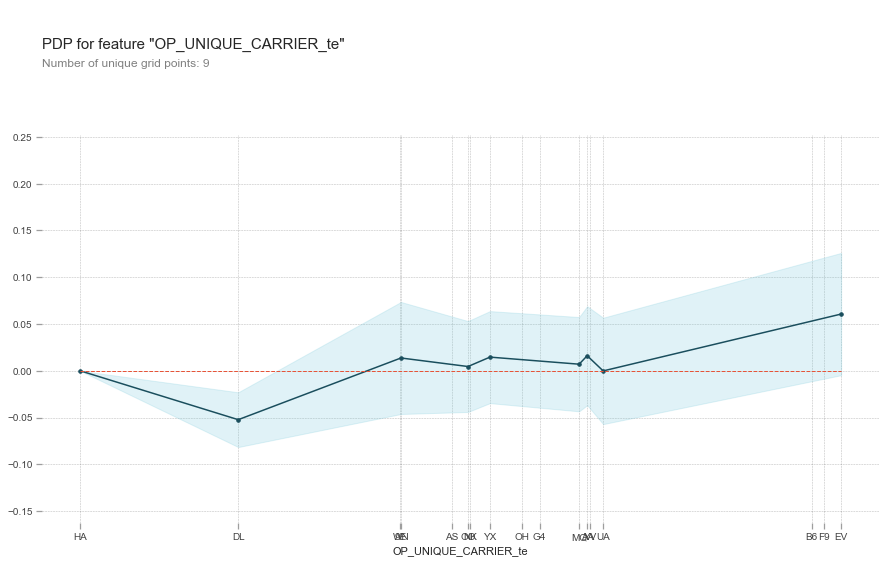

In [169]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_carrier = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns.tolist(), feature='OP_UNIQUE_CARRIER_te')

# plot it
fig, ax = pdp.pdp_plot(pdp_carrier, 'OP_UNIQUE_CARRIER_te')
plt.xticks(carrier['Encoded_value'], carrier.index);

## Shap Values for One Prediction

https://github.com/slundberg/shap  
https://slundberg.github.io/shap/notebooks/NHANES%20I%20Survival%20Model.html

- Every flight has one dot on each row
- The `x` position of the dot is the impact of that feature on the model's prediction for the flight
- The color of the dot represents the value of that feature for the flight. Dots that don't fit on the row pile up to show density. Since the XGBoost model has a logistic loss the x-axis has units of log-odds (Tree SHAP explains the change in the margin output of the model).

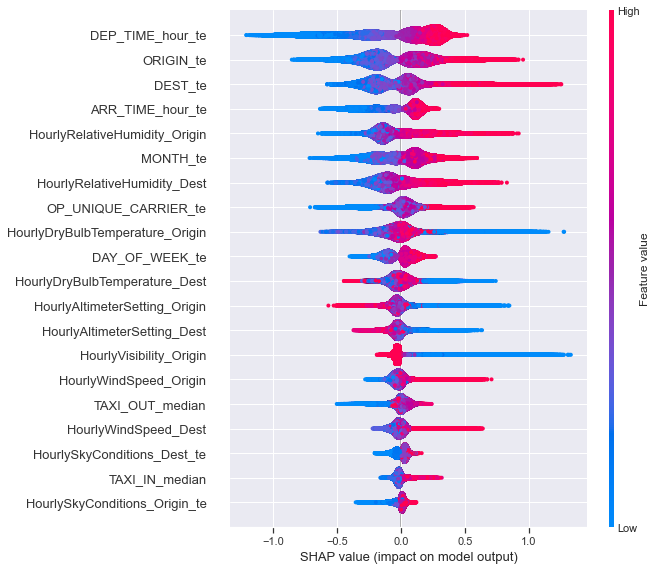

In [170]:
import shap  # package used to calculate Shap values

shap_values = shap.TreeExplainer(model).shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue

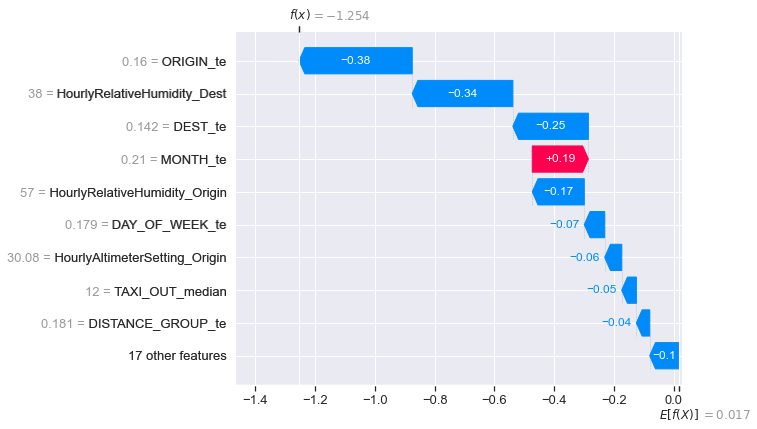

In [171]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [172]:
X_test.head(1)

,TAXI_OUT_median,TAXI_IN_median,HourlyAltimeterSetting_Origin,HourlyDryBulbTemperature_Origin,HourlyPrecipitation_Origin,HourlyRelativeHumidity_Origin,HourlyVisibility_Origin,HourlyWindGustSpeed_Origin,HourlyWindSpeed_Origin,HourlyAltimeterSetting_Dest,HourlyDryBulbTemperature_Dest,HourlyPrecipitation_Dest,HourlyRelativeHumidity_Dest,HourlyVisibility_Dest,HourlyWindGustSpeed_Dest,HourlyWindSpeed_Dest,MONTH_te,DAY_OF_WEEK_te,OP_UNIQUE_CARRIER_te,ORIGIN_te,DEST_te,DEP_TIME_hour_te,ARR_TIME_hour_te,DISTANCE_GROUP_te,HourlySkyConditions_Origin_te,HourlySkyConditions_Dest_te
240746,12,8,30.08,85.0,0.0,57.0,10.0,0.0,7.0,30.02,90.0,0.0,38.0,10.0,0.0,3.0,0.210272,0.178967,0.188211,0.160071,0.141915,0.182765,0.171485,0.18093,0.17924,0.173846


In [173]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

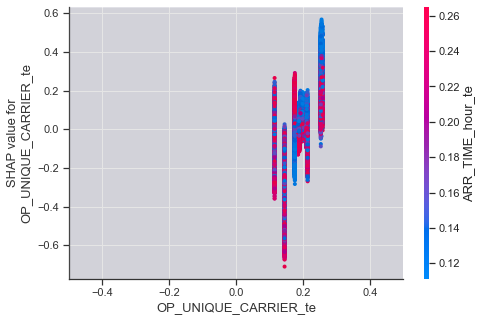

In [174]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"OP_UNIQUE_CARRIER_te"], color=shap_values)

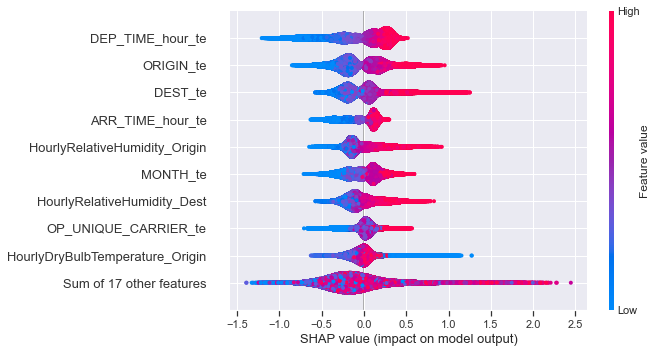

In [175]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

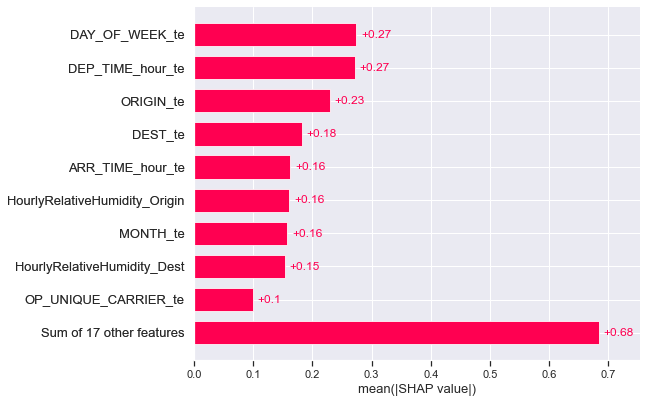

In [176]:
shap.plots.bar(shap_values)

___